In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import and Load txt data.
df = pd.read_csv('Resources/amazon_cells.txt', delimiter='\t', header=None)
# Set the column names.
df.columns = ['Reviews', 'Sentiment']

In [3]:
pd.set_option('display.max_colwidth', 5000)
df.head(10)

,Reviews,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [4]:
df.shape

(1000, 2)

In [5]:
df.describe()

,Sentiment
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


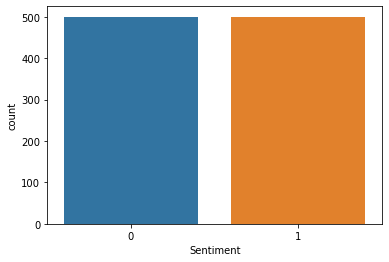

In [6]:
# Verify the distribution.
sns.countplot(data=df, x='Sentiment')
plt.show()

### Clean data

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
# nltk.download('punkt')

In [8]:
des_list = []
stop_words = stopwords.words('english')

for des in df.Reviews:
    # Remove special characters.
    des = re.sub('[^a-zA-Z]', ' ', des)
    
    # Convert to lower case.
    des = des.lower()
    
    # Perform tokenization - divide text into smaller text.
    des = nltk.word_tokenize(des)
    
    # Perform lemmatization - chop of xuffix.
    lemma = nltk.WordNetLemmatizer()
    des = [lemma.lemmatize(word) for word in des]
    
    # Remove stop words.
    des = [w for w in des if not w in stop_words]
    
    des = ' '.join(des)
    des_list.append(des)

In [9]:
df['Clean_reviews'] = des_list

In [10]:
df.head()

,Reviews,Sentiment,Clean_reviews
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,way plug u unless go converter
1,"Good case, Excellent value.",1,good case excellent value
2,Great for the jawbone.,1,great jawbone
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,tied charger conversation lasting minute major problem
4,The mic is great.,1,mic great


In [11]:
# Tokenizer.
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer_n = Tokenizer()
tokenizer_n.fit_on_texts(df.Clean_reviews)

# Vocabulary size.
vocab_size = len(tokenizer_n.word_index)+1
vocab_size

1568

### Train and split

In [12]:
# Split data into train and test set.
from sklearn.model_selection import train_test_split
X = np.array(des_list)
y = df.Sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)

In [13]:
X_train.shape

(800,)

In [14]:
X_test.shape

(200,)

In [15]:
X_train = pd.Series(X_train)
y_train = pd.Series(y_train)
X_test = pd.Series(X_test)
y_test = pd.Series(y_test)

In [16]:
# Extract dataset.
df.to_csv('Resources/clean_data.csv')
X_train.to_csv('Resources/X_train.csv')
y_train.to_csv('Resources/y_train.csv')
X_test.to_csv('Resources/X_test.csv')
y_test.to_csv('Resources/y_test.csv')

### Tokenize and pad data prepared for model.

In [17]:
# Tokenizer.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [18]:
# Vocabulary size.
vocab_size = len(tokenizer.word_index)+1
vocab_size

1388

In [19]:
# Word index.
word_index = tokenizer.word_index
# print(word_index)

In [20]:
# Word embedding length.
max_seq_emb = int(round(np.sqrt(np.sqrt(vocab_size)),0))
max_seq_emb

6

In [21]:
# Max sequence length.
def get_max_len(name):
    len_list = []
    for l in name:
        len_list.append(len(l))
    max_len = np.max(len_list)
    return max_len
max_len = get_max_len(df['Clean_reviews'])
max_len

113

In [22]:
# Pre-padding sequence.
import sys
from tensorflow.keras.preprocessing.sequence import pad_sequences

seq = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)

x_train = pad_sequences(seq, maxlen=max_len, padding='pre', truncating='pre')
x_test = pad_sequences(seq_test, maxlen=max_len, padding='pre', truncating='pre')

# Display the padded sequence.
np.set_printoptions(threshold=sys.maxsize)
x_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  21,   6, 251,  58], dtype=int32)

In [23]:
x_train.shape

(800, 113)

In [24]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(np.asarray(y_train))
y_test = to_categorical(np.asarray(y_test))

y_train.shape

(800, 2)

### Train the model

In [25]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model
from keras.models import Sequential  

In [26]:
# Functional API.
inputs = Input(shape=(max_len,), dtype='int32')

embed_layer = Embedding(vocab_size, 50, input_length=max_len, trainable=True)
hidden1 = embed_layer(inputs)
hidden2 = GlobalAveragePooling1D()(hidden1)
hidden3 = Dense(20, activation='relu')(hidden2)
hidden4 = Dense(10, activation='relu')(hidden3)

outputs = Dense(2, activation='softmax')(hidden4)

model = Model(inputs, outputs)

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Early stopping.
from keras.callbacks import EarlyStopping
monitor = EarlyStopping(patience=3)

m = model.fit(x_train, y_train, validation_split=0.3, epochs=40, callbacks=[monitor])

Epoch 1/40
18/18 [==============================] - 1s 20ms/step - loss: 0.6925 - acc: 0.5696 - val_loss: 0.6929 - val_acc: 0.4708
Epoch 2/40
18/18 [==============================] - 0s 10ms/step - loss: 0.6913 - acc: 0.5125 - val_loss: 0.6928 - val_acc: 0.4708
Epoch 3/40
18/18 [==============================] - 0s 8ms/step - loss: 0.6904 - acc: 0.5125 - val_loss: 0.6933 - val_acc: 0.4708
Epoch 4/40
18/18 [==============================] - 0s 8ms/step - loss: 0.6888 - acc: 0.5268 - val_loss: 0.6910 - val_acc: 0.4792
Epoch 5/40
18/18 [==============================] - 0s 9ms/step - loss: 0.6872 - acc: 0.5339 - val_loss: 0.6905 - val_acc: 0.4750
Epoch 6/40
18/18 [==============================] - 0s 7ms/step - loss: 0.6827 - acc: 0.7375 - val_loss: 0.6870 - val_acc: 0.5208
Epoch 7/40
18/18 [==============================] - 0s 8ms/step - loss: 0.6766 - acc: 0.6571 - val_loss: 0.6801 - val_acc: 0.5625
Epoch 8/40
18/18 [==============================] - 0s 7ms/step - loss: 0.6678 - acc: 0.

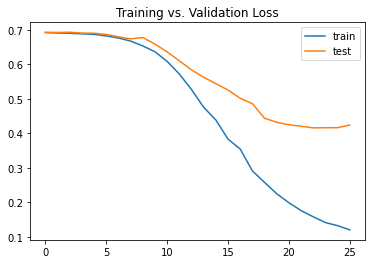

In [29]:
# Loss.
plt.plot(m.history['loss'], label='train')
plt.plot(m.history['val_loss'], label='test')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

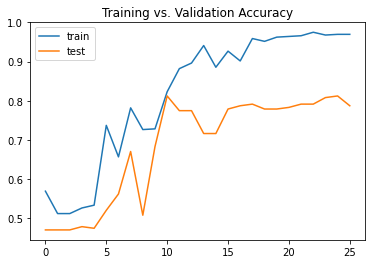

In [30]:
# Accuracy.
plt.plot(m.history['acc'], label='train')
plt.plot(m.history['val_acc'], label='test')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 113)]             0         
                                                                 
 embedding (Embedding)       (None, 113, 50)           69400     
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 20)                1020      
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                             

In [32]:
# Test set accuracy.
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.5589595437049866 / Test accuracy: 0.7400000095367432


In [33]:
# Roc-auc score.
from sklearn.metrics import roc_auc_score

y_pred = model.predict(x_test)
roc_auc_score(y_test, y_pred)

7/7 [==============================] - 0s 2ms/step


0.82175

In [34]:
# Save the model.
model.save('D213_NN_model.hs')

INFO:tensorflow:Assets written to: D213_NN_model.hs/assets


### Sequential API

In [35]:
# Sequential API.
model = Sequential()    

# Input tensor.
model.add(Input(shape=(max_len,)))
# Hidden layer1.
model.add(Dense(40, activation='relu')) 
# Hidden layer2.
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
# Output layer.
model.add(Dense(2, activation='softmax')) 

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

monitor = EarlyStopping(patience=2)
m = model.fit(x_train, y_train, validation_split=0.3, epochs=40, callbacks=[monitor])

Epoch 1/40
18/18 [==============================] - 1s 14ms/step - loss: 11.2724 - acc: 0.4714 - val_loss: 9.1355 - val_acc: 0.4667
Epoch 2/40
18/18 [==============================] - 0s 6ms/step - loss: 3.7962 - acc: 0.4946 - val_loss: 5.4761 - val_acc: 0.5167
Epoch 3/40
18/18 [==============================] - 0s 6ms/step - loss: 2.5544 - acc: 0.5339 - val_loss: 4.5691 - val_acc: 0.4958
Epoch 4/40
18/18 [==============================] - 0s 5ms/step - loss: 1.6249 - acc: 0.5679 - val_loss: 4.3699 - val_acc: 0.4833
Epoch 5/40
18/18 [==============================] - 0s 5ms/step - loss: 1.3940 - acc: 0.5768 - val_loss: 4.1374 - val_acc: 0.5500
Epoch 6/40
18/18 [==============================] - 0s 6ms/step - loss: 1.1721 - acc: 0.5911 - val_loss: 4.1298 - val_acc: 0.5292
Epoch 7/40
18/18 [==============================] - 0s 7ms/step - loss: 1.0572 - acc: 0.6054 - val_loss: 4.0957 - val_acc: 0.4917
Epoch 8/40
18/18 [==============================] - 0s 7ms/step - loss: 0.8318 - acc: 0.

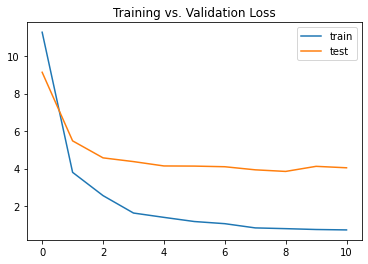

In [37]:
plt.plot(m.history['loss'], label='train')
plt.plot(m.history['val_loss'], label='test')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

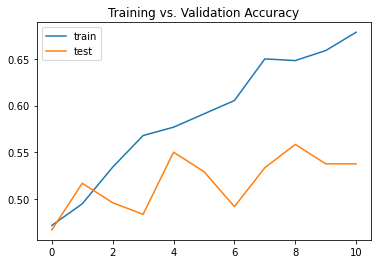

In [38]:
# Accuracy.
plt.plot(m.history['acc'], label='train')
plt.plot(m.history['val_acc'], label='test')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                4560      
                                                                 
 dense_4 (Dense)             (None, 30)                1230      
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 2)                 42        
                                                                 
Total params: 6,452
Trainable params: 6,452
Non-trainable params: 0
_________________________________________________________________


In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.625349521636963 / Test accuracy: 0.5149999856948853


In [42]:
# Roc-auc score.
y_pred = model.predict(x_test)
roc_auc_score(y_test, y_pred)

7/7 [==============================] - 0s 3ms/step


0.51915